<a href="https://colab.research.google.com/github/mthhkmh/UAS_AI/blob/main/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import Modules 
import pandas as pd

In [2]:
from google.colab import files
uploaded=files.upload()

Saving computer.csv to computer.csv


In [3]:
#Load dataset
deps_df = pd.read_csv('computer.csv')
deps_df.head()

,date,l_ipn,r_asn,f
0,2006-07-01,0,701,1
1,2006-07-01,0,714,1
2,2006-07-01,0,1239,1
3,2006-07-01,0,1680,1
4,2006-07-01,0,2514,1


In [4]:
#Drop Coloum id
#deps_df = deps_df.drop(columns='date')
deps_df.drop(columns='date', inplace=True)
deps_df.head()

,l_ipn,r_asn,f
0,0,701,1
1,0,714,1
2,0,1239,1
3,0,1680,1
4,0,2514,1


In [5]:
#identify the shape of the datatset
deps_df.shape

(20803, 3)

In [6]:
#Get the list of columns
deps_df.columns

Index(['l_ipn', 'r_asn', 'f'], dtype='object')

In [7]:
#identify data types for each column
deps_df.dtypes

l_ipn    int64
r_asn    int64
f        int64
dtype: object

In [8]:
#Get bassic dataset information
deps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20803 entries, 0 to 20802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   l_ipn   20803 non-null  int64
 1   r_asn   20803 non-null  int64
 2   f       20803 non-null  int64
dtypes: int64(3)
memory usage: 487.7 KB


In [9]:
#identify missing values
#deps_df.isnull(). values.any()
deps_df.isna(). values.any()

False

In [10]:
#identify duplicate entries/rows
#iris_df[iris_df.duplicated(keep=False)]
deps_df[deps_df.duplicated()]

,l_ipn,r_asn,f
221,0,701,1
223,0,2514,1
228,0,3320,1
237,0,12542,1
244,0,19262,1
...,...,...,...
20797,8,35845,1
20799,8,36856,4
20800,9,2152,1
20801,9,8070,1


In [11]:
deps_df.duplicated().value_counts() #hitung jumlah duplikat

False    11684
True      9119
dtype: int64

In [12]:
#Drop duplicate entries/rows
deps_df.drop_duplicates(inplace=True) #mengahapus duplikasi data
deps_df.shape #melihat dimensi data

(11684, 3)

In [13]:
deps_df.describe()

,l_ipn,r_asn,f
count,11684.000000,11684.000000,11684.000000
mean,4.692913,12804.587898,161.522595
std,3.217236,9912.500008,7691.870655
min,0.000000,3.000000,1.000000
25%,2.000000,4732.000000,1.000000
50%,5.000000,10197.000000,4.000000
75%,8.000000,18924.000000,17.000000
max,9.000000,40092.000000,784234.000000


In [14]:
deps_df.corr()

,l_ipn,r_asn,f
l_ipn,1.000000,0.007415,-0.005374
r_asn,0.007415,1.000000,-0.010901
f,-0.005374,-0.010901,1.000000


In [15]:
#Iris Dataset:Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#output dari visualisasi data akan diarahkan ke notebook
%matplotlib inline

In [16]:
#Iris Dataset: Classification Models
#import Modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [17]:
X = deps_df.drop(columns='f')
X.head()

,l_ipn,r_asn
0,0,701
1,0,714
2,0,1239
3,0,1680
4,0,2514


In [18]:
y= deps_df['r_asn'] #menempatkan class label (target)
y.head() 

0     701
1     714
2    1239
3    1680
4    2514
Name: r_asn, dtype: int64

In [19]:
#Split the dataset into a training set and tseting set
#membagi dataset ke dalam training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=10)

In [20]:
# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

In [21]:
k_range = list(range(1,26))
scores= []
for k in k_range:
  model_knn = KNeighborsClassifier(n_neighbors=k) #konfigurasi algoritma
  model_knn.fit(X_train, y_train) #training model/classifier
  y_pred = model_knn.predict(X_test) #melakukan prediksi 
  scores.append(accuracy_score(y_test, y_pred)) #evaluasi performa

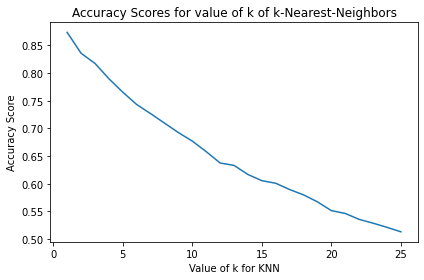

In [23]:
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for value of k of k-Nearest-Neighbors')
plt.tight_layout()
plt.show()


In [24]:
model_knn = KNeighborsClassifier(n_neighbors=3) #konfigurasi algoritma
model_knn.fit(X_train, y_train) #training model/classifier
y_pred = model_knn.predict(X_test) #melakukan prediksi

In [25]:
#Accuracy Score
print(accuracy_score(y_test, y_pred)) #evaluasi akurasi

0.8175010697475396


In [26]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred)) #evaluasi akurasi

[[10  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  1 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  0]]


In [27]:
#Classification Report
print(classification_report(y_test, y_pred)) #evaluasi klasifikasi

              precision    recall  f1-score   support

           3       0.91      1.00      0.95        10
           4       0.00      0.00      0.00         1
           8       0.25      1.00      0.40         1
           9       0.00      0.00      0.00         3
          12       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         4
          16       0.00      0.00      0.00         4
          17       0.17      1.00      0.29         1
          20       0.00      0.00      0.00         1
          25       1.00      0.40      0.57         5
          26       1.00      1.00      1.00         3
          27       0.38      1.00      0.55         3
          29       0.00      0.00      0.00         1
          31       0.50      0.67      0.57         3
          38       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         2
          46       0.80      1.00      0.89         4
          47       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

In [28]:
#Logistic.Regression LR
from sklearn.linear_model import LogisticRegression

In [29]:
# model_logreg = LogisticRegression()
model_logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
model_logreg.fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
print(accuracy_score(y_test, y_pred))

0.01904150620453573


In [31]:
print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [32]:
#Accuracy Score
print(accuracy_score(y_test, y_pred))


0.01904150620453573


In [33]:
#Classification_Report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         5
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         3
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         3
          38       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         4
          47       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
#Support Vector Classifier(MOdel SVM)
from sklearn.svm import SVC

In [35]:
#Decision Tree Classifier (DT)
from sklearn.tree import DecisionTreeClassifier

In [36]:
from sklearn.svm import SVC

In [37]:
model_svc = SVC(gamma='scale')
model_svc.fit(X_train,y_train)
y_pred = model_svc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6341463414634146


In [38]:
print(confusion_matrix(y_test,y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         4
          17       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         5
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         3
          29       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         3
          38       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         2
          46       0.00      0.00      0.00         4
          47       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
#Decision Tree Classifier (DT)
from sklearn.tree import DecisionTreeClassifier

In [41]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)

In [42]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [43]:

model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [44]:

models = [model_knn, model_logreg, model_svc, model_dt, model_rf]
accuracy_scores = []
for model in models:
  y_pred = model.predict(X_test)
  accuracy =accuracy_score(y_test,y_pred)
  accuracy_scores.append(accuracy)

  

In [ ]:
print(accuracy_scores)

[0.8175010697475396, 0.01904150620453573, 0.10890029952931109, 0.8673513050919983, 0.6341463414634146]


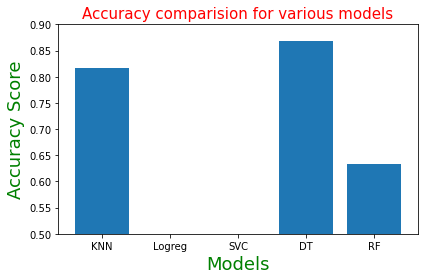

In [ ]:
plt.bar(['KNN', 'Logreg', 'SVC', 'DT', 'RF'], accuracy_scores)
plt.ylim(0.50,0.90)
plt.title('Accuracy comparision for various models', fontsize=15, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('Accuracy Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()